# Customer Segmentation: Clustering

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

Veri setimizi TT MTS Test Ekibi ile çalışarak elde ettik. Veriler MTS test sistemlerinde bulunan Müşteri kayıtlarıdır. Veri setimiz 4075 satır ve 23 kolondan oluşuyor.



In [ ]:
#Loading the dataset
data = pd.read_csv("/content/mts_v7.csv")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 4075


,CUST_ORD_ITEM_ID,CUST_ID,CUST_TYPE,FRST_NAME,LST_NAME,BRTH_DATE,AGE,AGE_CATEGORY,GENDR,MARITAL_STATUS,...,ACCPT_PRM,CUST_ORD_ID,SALE_CHANNEL,SIPARIS,CDATE,UDATE,AKTIVASYON_SERVIS,DEAKTIVASYON_SERVIS,CMPG_NAME,CMPG_TYPE
0,1.673220e+10,1.346319e+10,Özel,KÜBRA,ÇİL,1993-11-28 00:00:00.000,31.0,1.0,Kadin,Evli,...,1.0,3.719669e+09,TT OFIS,Kampanya Katılımı/Değişikliği,2024-08-01 09:03:07.000,2024-08-01 09:07:25.000,VDSL Internet Servis,VDSL Internet Servis,4 Mevsim Kampanyası,0.0
1,1.673110e+10,1.346321e+10,Özel,EMRE,GÜRBÜZ,1994-07-25 00:00:00.000,30.0,1.0,Erkek,Bekar,...,1.0,3.719252e+09,TT OFIS,NAKİL,2024-02-05 16:25:06.000,2024-02-05 16:38:00.000,VDSL Internet Servis,VDSL Internet Servis,4 Mevsim Kampanyası,0.0
2,1.672990e+10,1.346272e+10,Özel,GÜVEN,ÖZMERSİN,1982-01-08 00:00:00.000,42.0,1.0,Erkek,Evli,...,1.0,3.718784e+09,TTM,NAKİL,2023-07-07 09:28:00.000,2023-07-07 11:03:08.000,ADSL Internet Servis,VDSL Internet Servis,Bizden Kampanyası,0.0
3,1.672985e+10,1.346265e+10,Özel,MUHARREM ZEKI,SEN,1959-09-15 00:00:00.000,65.0,2.0,Erkek,Bekar,...,0.0,3.718765e+09,CALL CENTER,NAKİL,2023-06-14 16:14:29.000,2023-06-14 16:22:37.000,VDSL Internet Servis,VDSL Internet Servis,Emekliye İnternet Kampanyası,1.0
4,1.673002e+10,1.346281e+10,Özel,MÜMİN,YÜKSEL,1978-01-14 00:00:00.000,46.0,1.0,Erkek,Evli,...,1.0,3.718826e+09,TTM,NAKİL,2023-07-31 14:55:32.000,2023-07-31 15:26:01.000,VDSL Internet Servis,VDSL Internet Servis,4 Mevsim Kampanyası,0.0


In [ ]:
#Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4075 entries, 0 to 4074
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ORD_ITEM_ID     4073 non-null   float64
 1   CUST_ID              4073 non-null   float64
 2   CUST_TYPE            4073 non-null   object 
 3   FRST_NAME            4073 non-null   object 
 4   LST_NAME             4073 non-null   object 
 5   BRTH_DATE            4073 non-null   object 
 6   AGE                  4073 non-null   float64
 7   AGE_CATEGORY         4073 non-null   float64
 8   GENDR                4073 non-null   object 
 9   MARITAL_STATUS       4073 non-null   object 
 10  CHILDREN             4073 non-null   float64
 11  INCOME               4073 non-null   float64
 12  EDUCATION            4073 non-null   float64
 13  ACCPT_PRM            4073 non-null   float64
 14  CUST_ORD_ID          4073 non-null   float64
 15  SALE_CHANNEL         4073 non-null   o

Veri setimiz üzerinde genel dağılıma göz attık.

In [ ]:
print("Total categories in the feature Marital_Status:\n", data["MARITAL_STATUS"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["EDUCATION"].value_counts())
print("Total categories in the feature Education:\n", data["AGE"].value_counts())
print("Total categories in the feature Education:\n", data["CHILDREN"].value_counts())

Total categories in the feature Marital_Status:
 MARITAL_STATUS
Evli     2410
Bekar    1446
Dul       217
Name: count, dtype: int64 

Total categories in the feature Education:
 EDUCATION
1.0    1379
2.0    1348
0.0    1346
Name: count, dtype: int64
Total categories in the feature Education:
 AGE
46.0    434
27.0    216
44.0    198
34.0    172
35.0    161
       ... 
68.0      3
67.0      3
82.0      1
78.0      1
92.0      1
Name: count, Length: 68, dtype: int64
Total categories in the feature Education:
 CHILDREN
0.0    2133
1.0     657
2.0     647
3.0     636
Name: count, dtype: int64


veri setimizi daha iyi kümeleyebilmek için veri setimizealgoritmada kullanılmayacak kolonları temizledim

In [ ]:

#Dropping some of the redundant features
to_drop = ["CUST_ORD_ITEM_ID", "CUST_ID", "CUST_TYPE", "FRST_NAME", "LST_NAME", "BRTH_DATE", "CUST_ORD_ID","AGE","DEAKTIVASYON_SERVIS","CDATE","UDATE"]
data = data.drop(to_drop, axis=1)

Veri setimizi describe ettim.

In [ ]:
data.describe()

,AGE_CATEGORY,CHILDREN,INCOME,EDUCATION,ACCPT_PRM,CMPG_TYPE
count,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000
mean,0.930764,0.947459,1.216302,1.000491,0.924626,0.124478
std,0.589794,1.142237,0.821560,0.813383,0.264027,0.330167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000
max,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000


Verilerin daha geniş görünümünü görmek için seçilen özelliklere göre grafıklerini çıkardım.


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

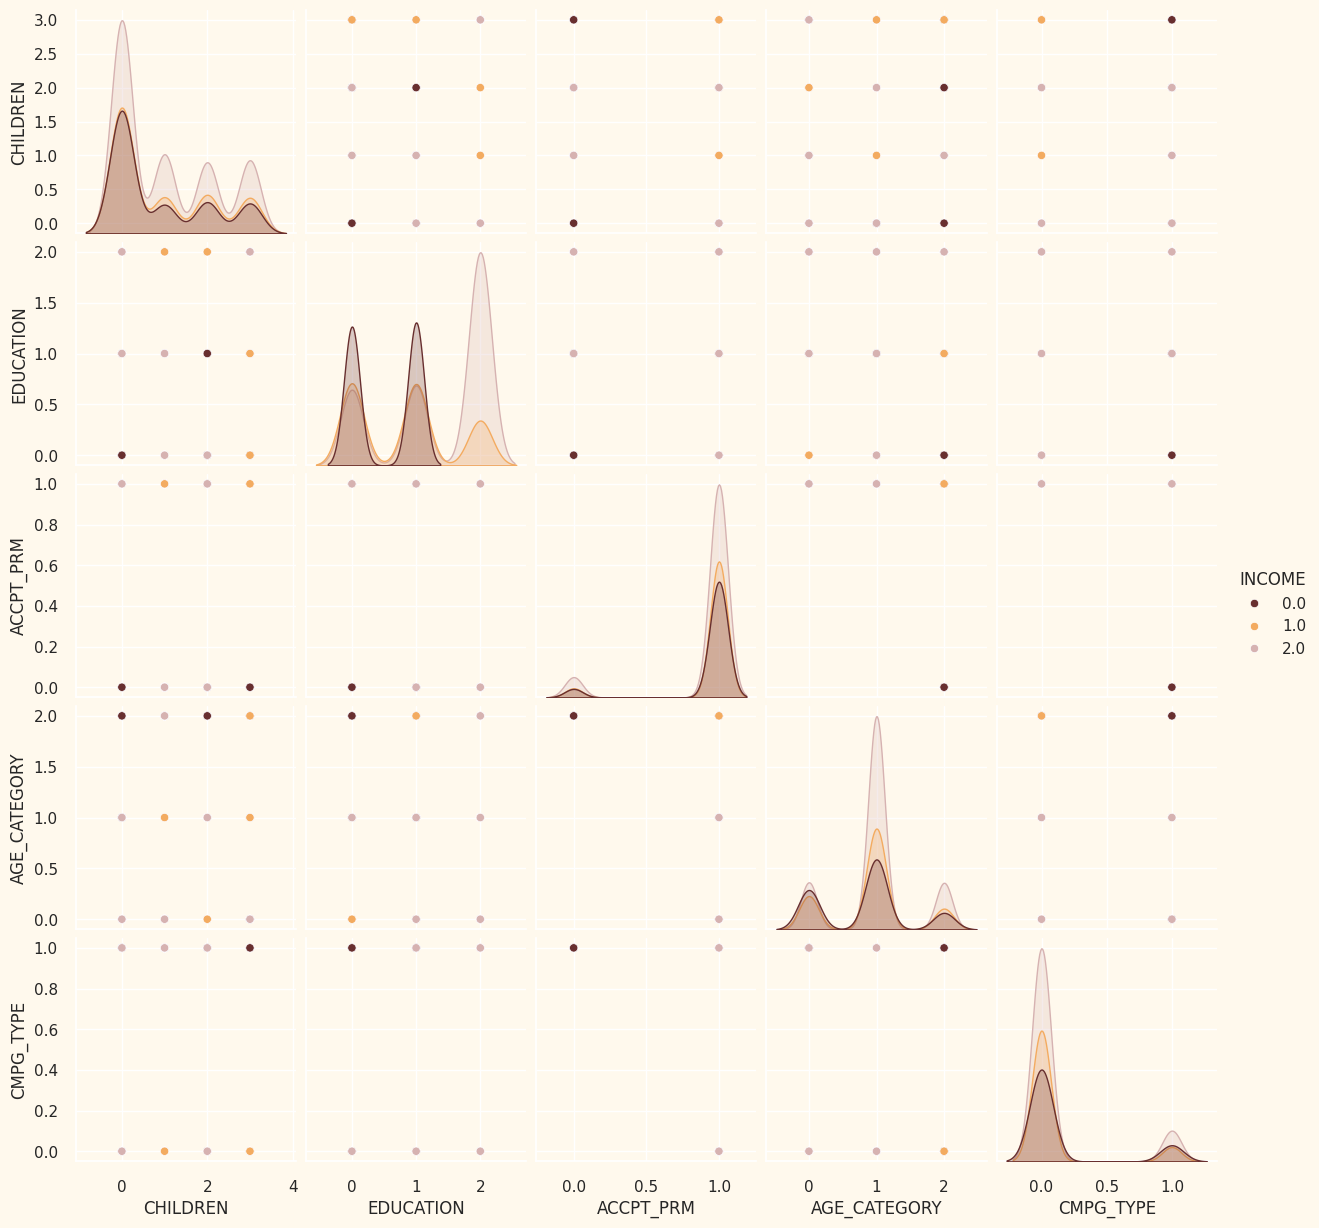

In [ ]:
#To plot some selected features
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = [ "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60","#228B25"]
cmap = colors.ListedColormap(["#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60","#228B25"])
#Plotting following features
To_Plot = [ "CHILDREN", "INCOME", "EDUCATION","ACCPT_PRM","AGE_CATEGORY","CMPG_TYPE"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "INCOME",palette= (["#682F2F","#F3AB60","#D6B2B1"]))
#Taking hue
plt.show()

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

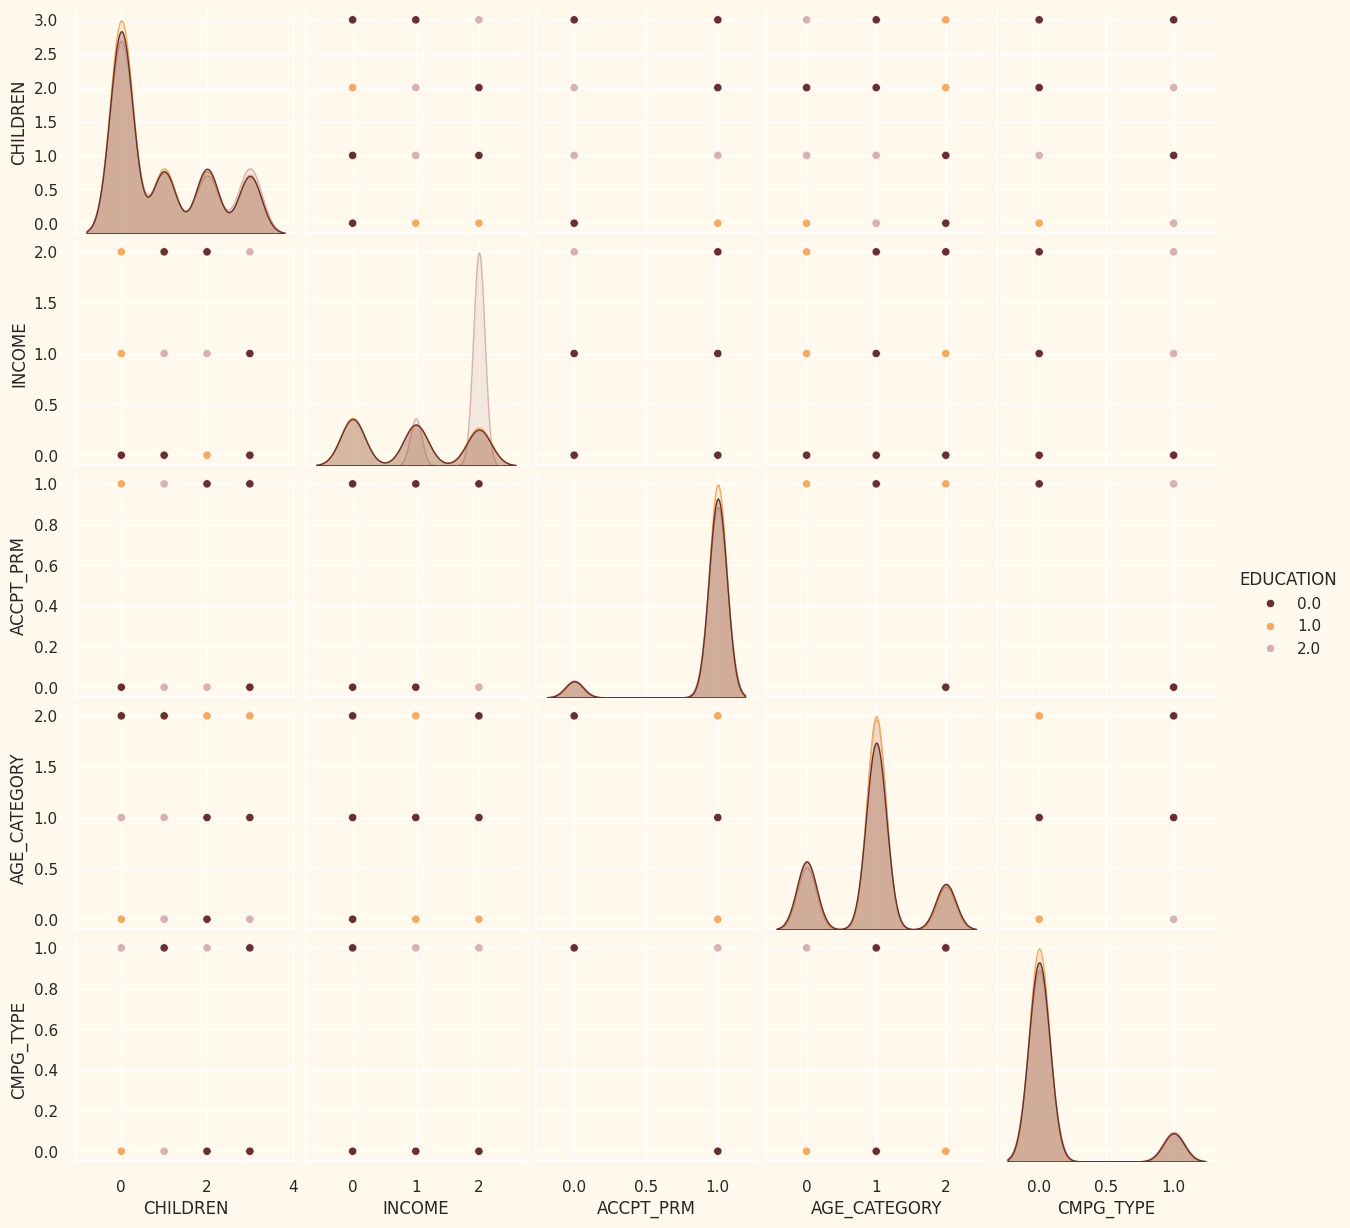

In [ ]:
#To plot some selected features
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = [ "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60","#228B25"]
cmap = colors.ListedColormap(["#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60","#228B25"])
#Plotting following features
To_Plot = [ "CHILDREN", "INCOME", "EDUCATION","ACCPT_PRM","AGE_CATEGORY","CMPG_TYPE"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "EDUCATION",palette= (["#682F2F","#F3AB60","#D6B2B1"]))
#Taking hue
plt.show()

Reletive Plot Of Some Selected Features: A Data Subset


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/

<Figure size 800x550 with 0 Axes>

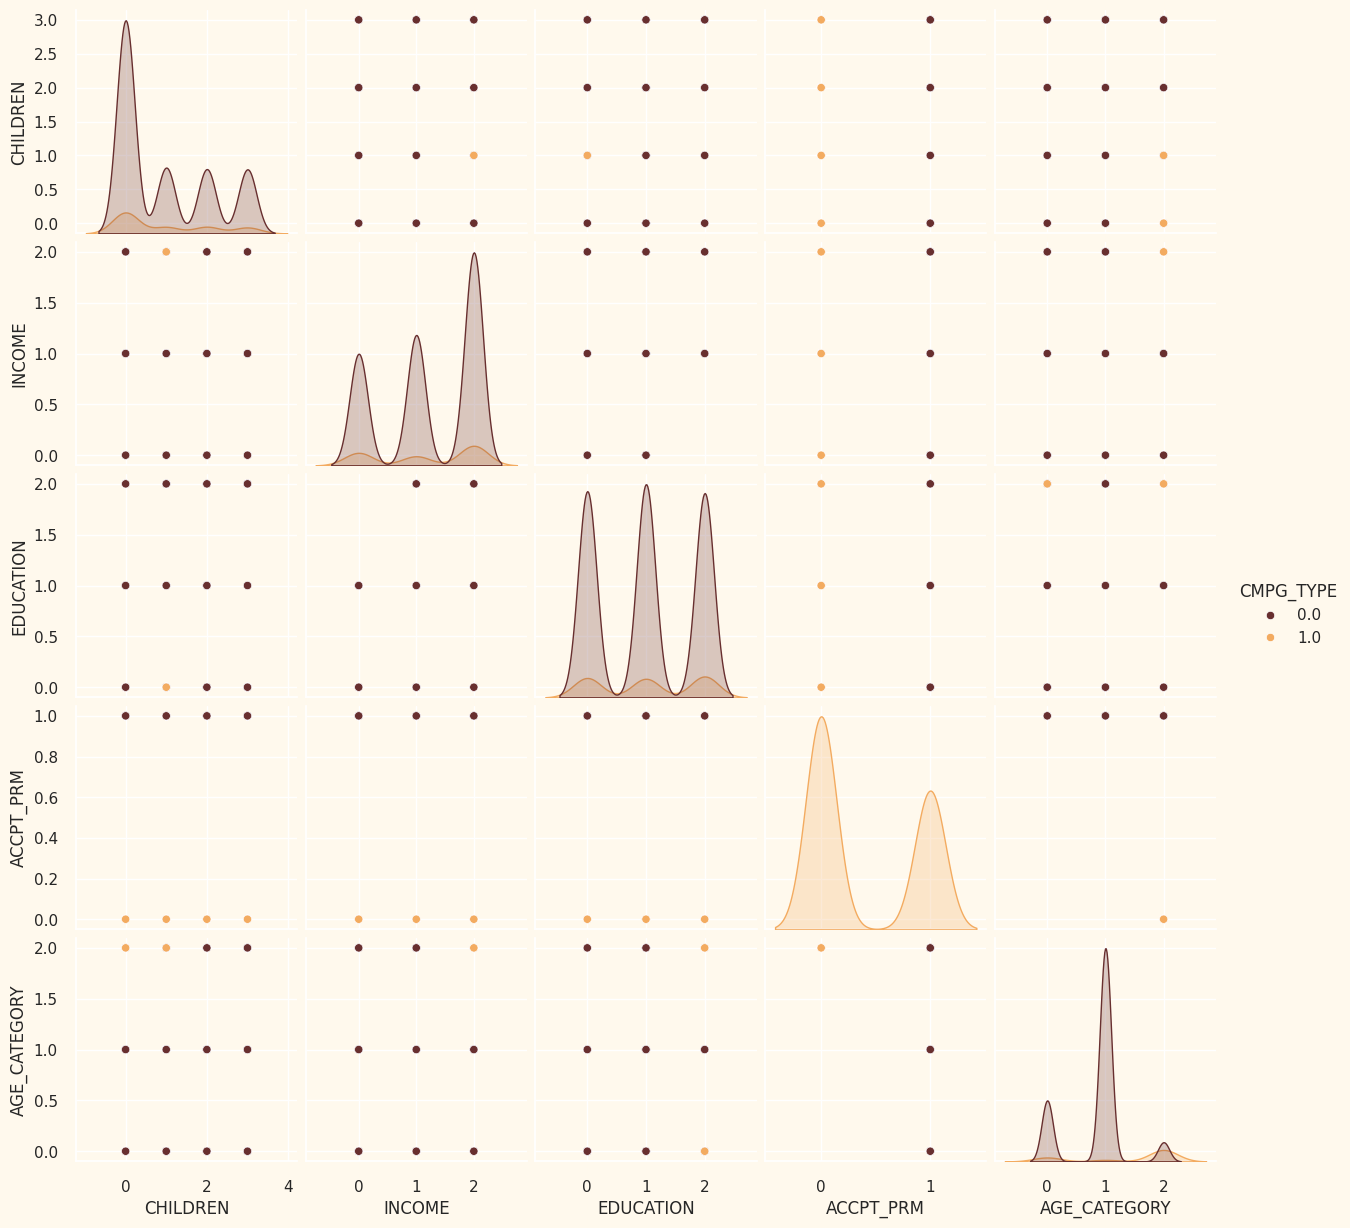

In [ ]:
#To plot some selected features
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = [ "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60","#228B25"]
cmap = colors.ListedColormap(["#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60","#228B25"])
#Plotting following features
To_Plot = [ "CHILDREN", "INCOME", "EDUCATION","ACCPT_PRM","AGE_CATEGORY","CMPG_TYPE"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "CMPG_TYPE",palette= (["#682F2F","#F3AB60","#D6B2B1"]))
#Taking hue
plt.show()

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

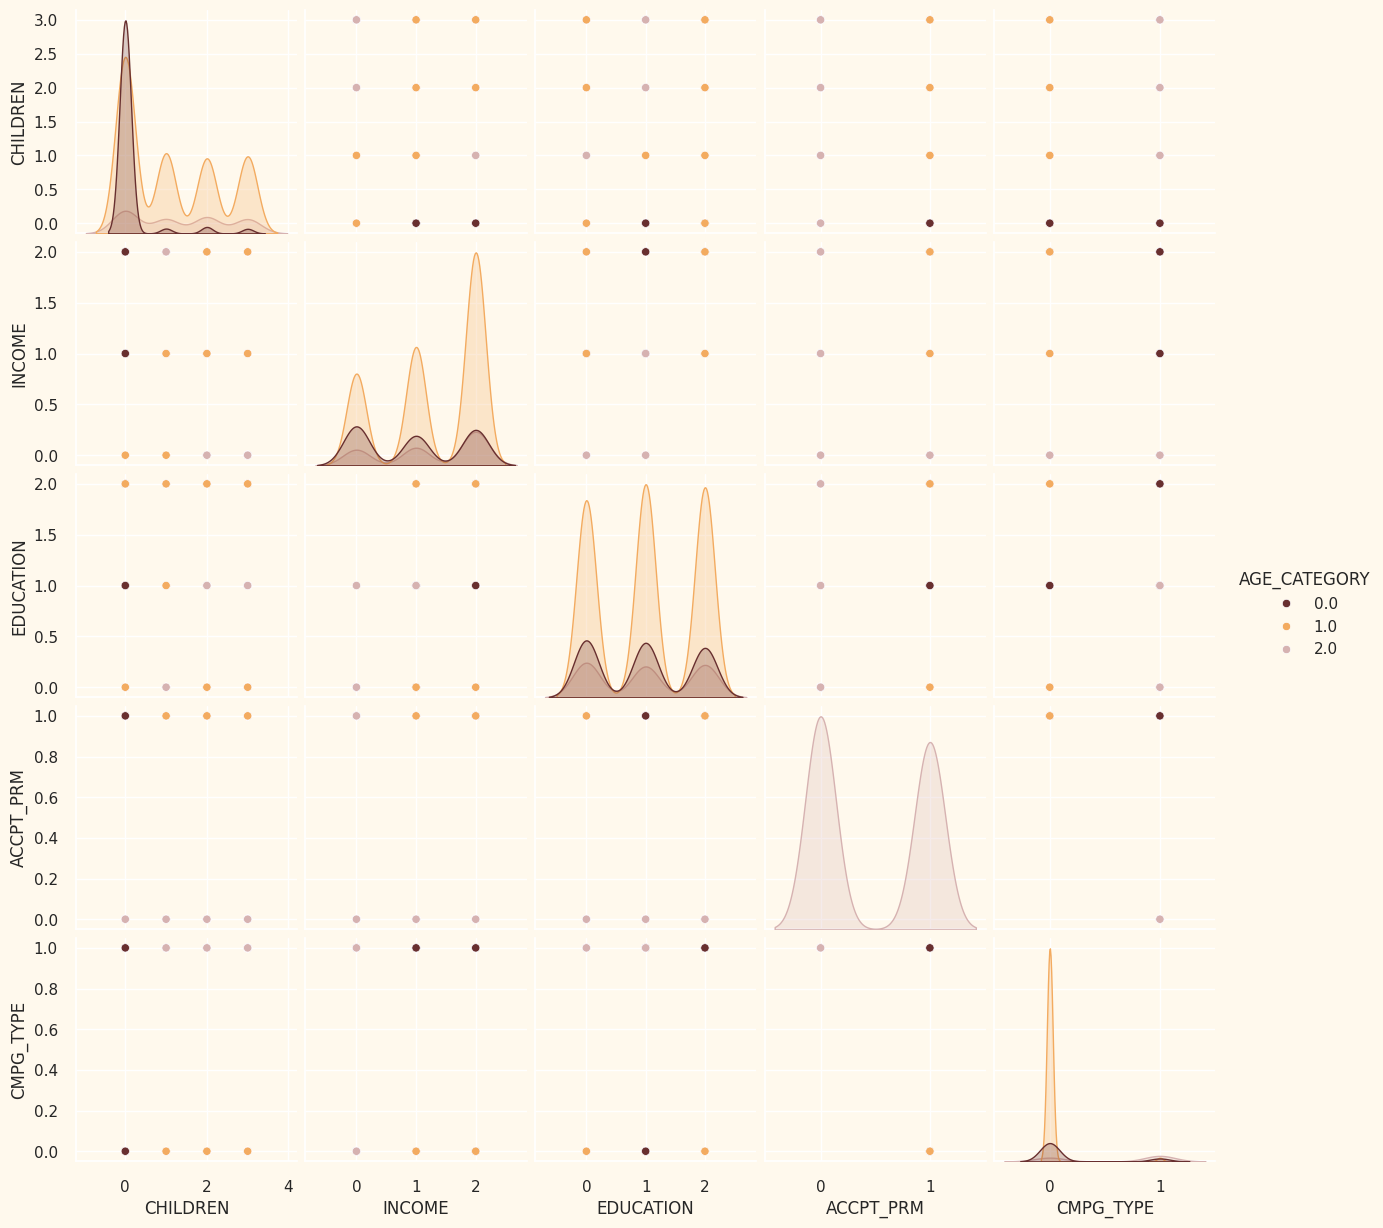

In [ ]:
#To plot some selected features
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = [ "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60","#228B25"]
cmap = colors.ListedColormap(["#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60","#228B25"])
#Plotting following features
To_Plot = [ "CHILDREN", "INCOME", "EDUCATION","ACCPT_PRM","AGE_CATEGORY","CMPG_TYPE"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "AGE_CATEGORY",palette= (["#682F2F","#F3AB60","#D6B2B1"]))
#Taking hue
plt.show()

correlation matrix çıkardık.

<Axes: >

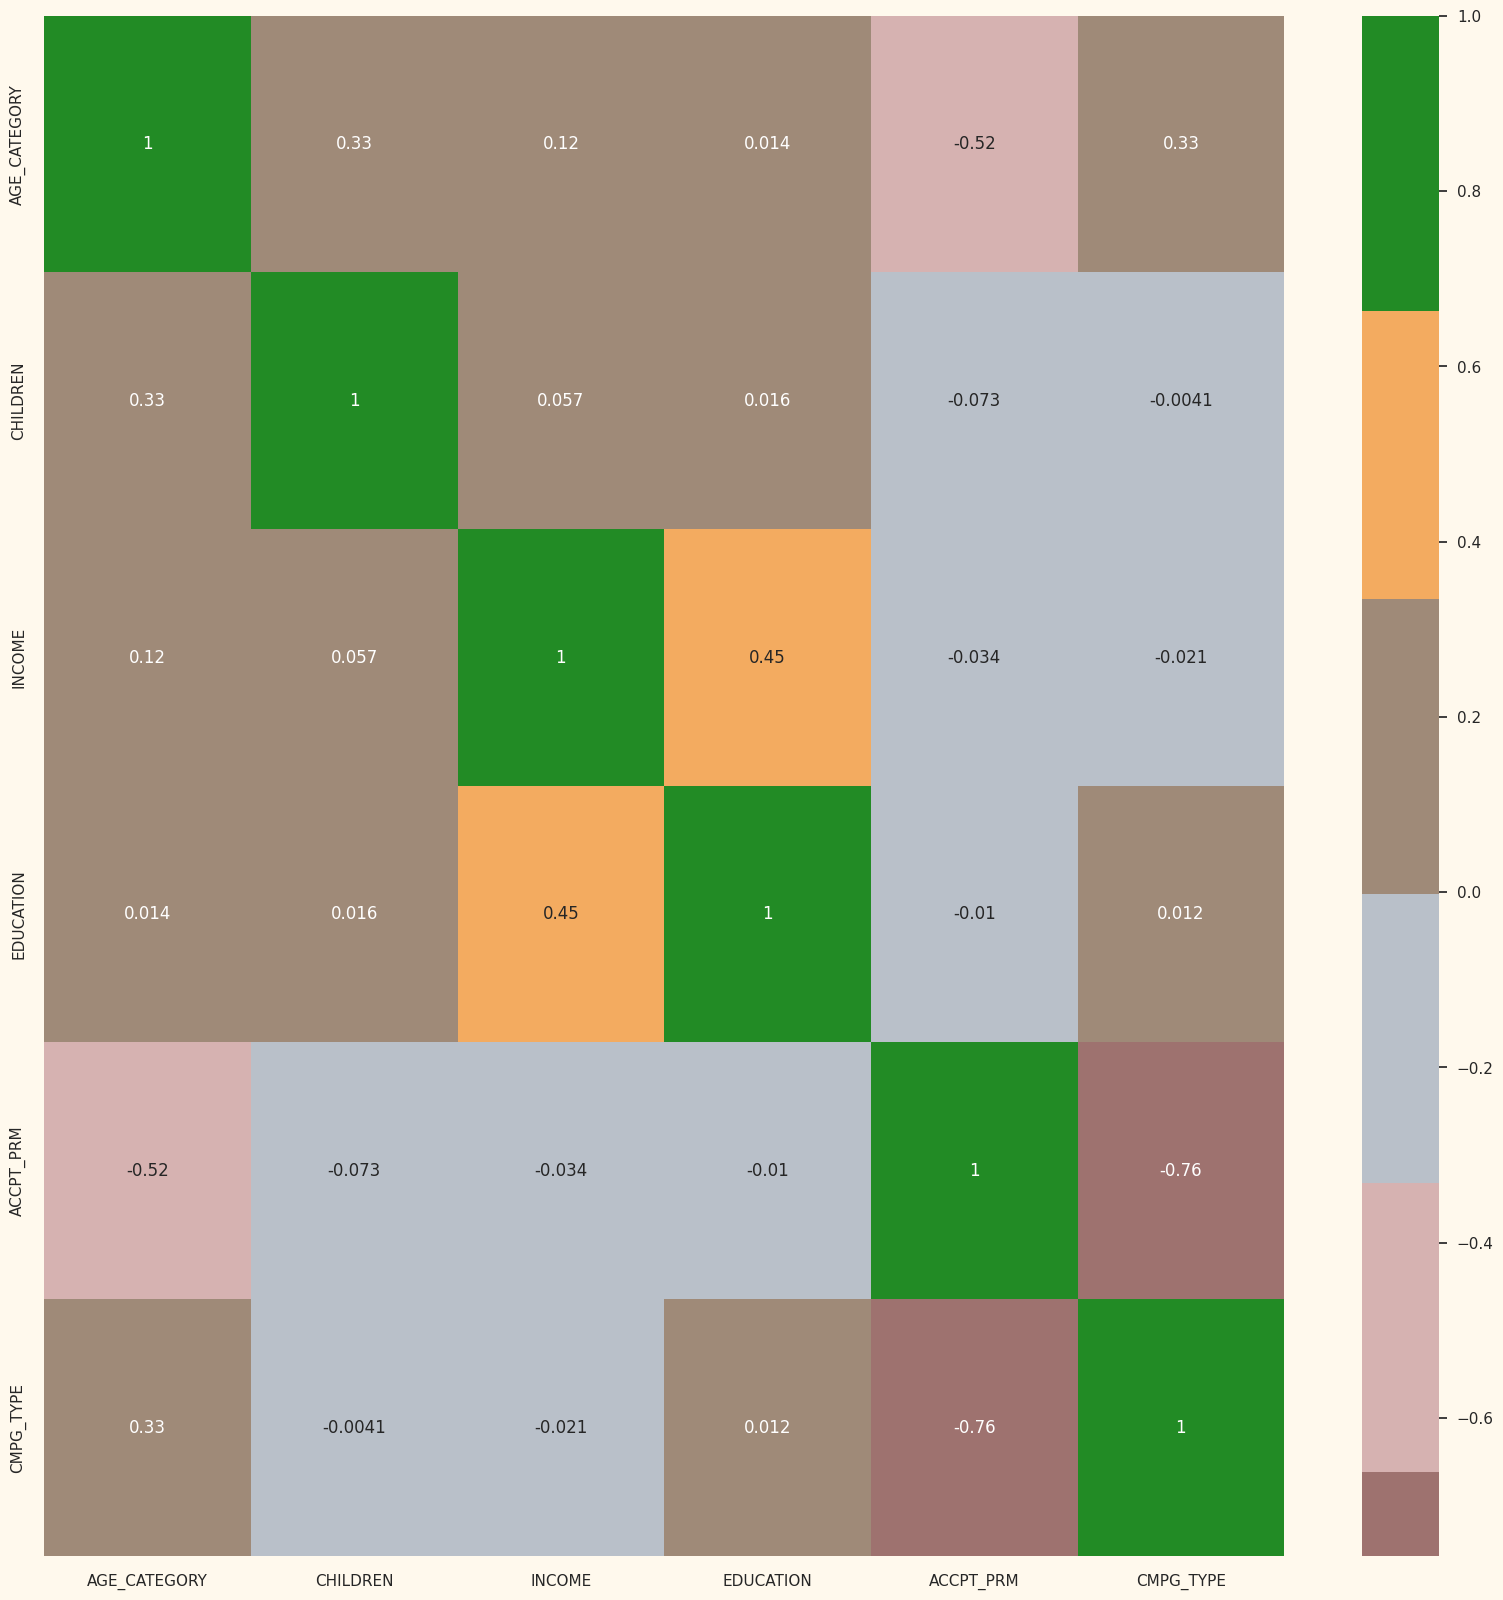

In [ ]:
#correlation matrix
corrmat= data.corr(numeric_only=True)
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

text olan veri kolonlarını bulduk

In [ ]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['GENDR', 'MARITAL_STATUS', 'SALE_CHANNEL', 'SIPARIS', 'AKTIVASYON_SERVIS', 'CMPG_NAME']


text olan verileri numerik hale getirerek tüm veri kolonlarımızı numerek hale getirdik.

In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


veri setimiz tüm kolonlar numerk hale geldikten sonra datayı scale ettik.

In [ ]:
#Creating a copy of data
ds = data.copy()
ds.dropna(inplace=True)
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,AGE_CATEGORY,GENDR,MARITAL_STATUS,CHILDREN,INCOME,EDUCATION,ACCPT_PRM,SALE_CHANNEL,SIPARIS,AKTIVASYON_SERVIS,CMPG_NAME,CMPG_TYPE
0,0.117405,1.334452,0.808797,0.921587,-0.263315,-0.000604,0.285515,0.364730,-0.606399,0.650933,-0.637313,-0.377062
1,0.117405,-0.727469,-1.310360,-0.829579,0.954032,1.228981,0.285515,0.364730,0.092092,0.650933,-0.637313,-0.377062
2,0.117405,-0.727469,0.808797,-0.829579,-0.263315,-1.230189,0.285515,0.673511,0.092092,-1.055148,-0.359342,-0.377062
3,1.813120,-0.727469,-1.310360,-0.829579,0.954032,1.228981,-3.502442,-3.340640,0.092092,0.650933,0.037760,2.652080
4,0.117405,-0.727469,0.808797,0.046004,0.954032,-1.230189,0.285515,0.673511,0.092092,0.650933,-0.637313,-0.377062


In [ ]:
scaled_ds

,AGE_CATEGORY,GENDR,MARITAL_STATUS,CHILDREN,INCOME,EDUCATION,ACCPT_PRM,SALE_CHANNEL,SIPARIS,AKTIVASYON_SERVIS,CMPG_NAME,CMPG_TYPE
0,0.117405,1.334452,0.808797,0.921587,-0.263315,-0.000604,0.285515,0.364730,-0.606399,0.650933,-0.637313,-0.377062
1,0.117405,-0.727469,-1.310360,-0.829579,0.954032,1.228981,0.285515,0.364730,0.092092,0.650933,-0.637313,-0.377062
2,0.117405,-0.727469,0.808797,-0.829579,-0.263315,-1.230189,0.285515,0.673511,0.092092,-1.055148,-0.359342,-0.377062
3,1.813120,-0.727469,-1.310360,-0.829579,0.954032,1.228981,-3.502442,-3.340640,0.092092,0.650933,0.037760,2.652080
4,0.117405,-0.727469,0.808797,0.046004,0.954032,-1.230189,0.285515,0.673511,0.092092,0.650933,-0.637313,-0.377062
...,...,...,...,...,...,...,...,...,...,...,...,...
4068,0.117405,1.334452,0.808797,1.797170,-0.263315,-1.230189,0.285515,0.364730,2.187565,0.650933,-0.637313,-0.377062
4069,-1.578309,-0.727469,-1.310360,-0.829579,0.954032,1.228981,0.285515,0.364730,2.187565,0.082239,1.149646,2.652080
4070,0.117405,-0.727469,-1.310360,-0.829579,0.954032,1.228981,0.285515,0.364730,2.187565,0.650933,-0.637313,-0.377062
4071,-1.578309,-0.727469,-1.310360,-0.829579,0.954032,-0.000604,0.285515,0.364730,2.187565,-0.486454,-0.677023,-0.377062


Bu problemde, nihai sınıflandırmanın yapılacağı temelde birçok faktör vardır. Bu faktörler temel olarak nitelikler veya özelliklerdir. Özellik sayısı arttıkça, onunla çalışmak da zorlaşır. Bu özelliklerin çoğu birbiriyle ilişkilidir ve dolayısıyla gereksizdir. Bu nedenle, seçilen özellikleri bir sınıflandırıcıdan geçirmeden önce boyut indirgeme işlemi uygulayacağım.
Boyutsallık azaltma, bir dizi temel değişken elde ederek dikkate alınan rastgele değişkenlerin sayısını azaltma işlemidir.

Temel bileşen analizi (PCA), bu tür veri kümelerinin boyutluluğunu azaltmak, yorumlanabilirliği artırmak ve aynı zamanda bilgi kaybını en aza indirmek için kullanılan bir tekniktir.

Bu bölümdeki adımlar:

PCA ile boyut azaltma
Küçültülmüş veri çerçevesini çizme
PCA ile boyut azaltma

Bu proje için boyutları 3'e indireceğim.





In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,4073.0,0.000000e+00,1.538914,-2.534899,-1.000717,-0.007635,0.605405,5.068152
col2,4073.0,3.489039e-18,1.307544,-2.325567,-1.032166,-0.152730,0.810504,4.653397
col3,4073.0,-2.093423e-17,1.194178,-2.537231,-0.910123,-0.057051,1.084945,2.230568


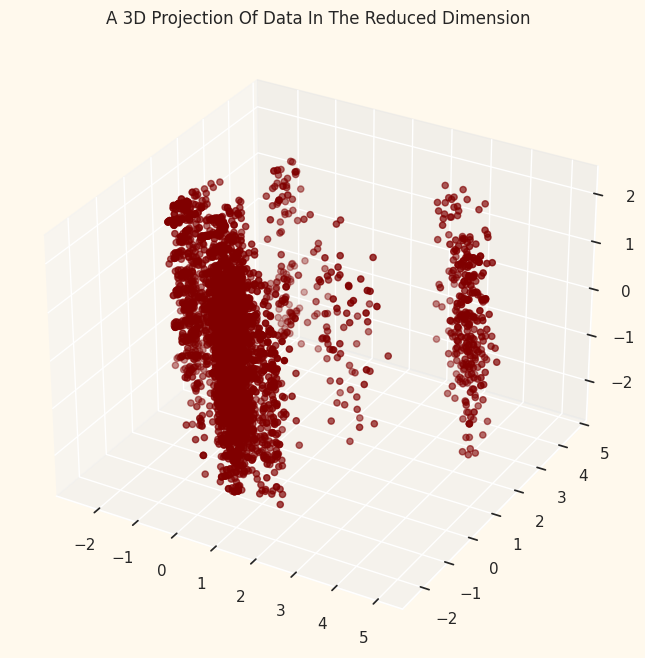

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Şimdi öznitelikleri üç boyuta indirgediğime göre, Aglomeratif kümeleme yoluyla kümeleme yapacağım. Aglomeratif kümeleme hiyerarşik bir kümeleme yöntemidir. İstenen küme sayısına ulaşılana kadar örneklerin birleştirilmesini içerir.

Kümelemede yer alan adımlar

Oluşturulacak küme sayısını belirlemek için Dirsek Yöntemi
Aglomeratif Kümeleme ile Kümeleme
Dağılım grafiği aracılığıyla oluşan kümelerin incelenmesi



Elbow Method to determine the number of clusters to be formed:


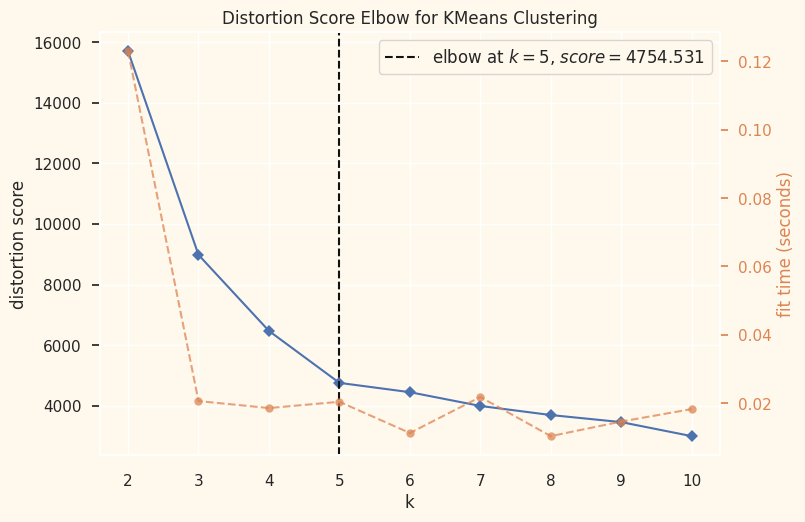

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Yukarıdaki hücre, bu veriler için en uygun küme sayısının Beş olacağını göstermektedir. Daha sonra, nihai kümeleri elde etmek için Aglomeratif Kümeleme Modelini uygulayacağız.

In [ ]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
# Instead of directly assigning yhat_AC, create a new Series with the correct index
data["Clusters"] = pd.Series(yhat_AC, index=PCA_ds.index) # Using PCA_ds index
# If you want to align with the original data index:
# data = data.reset_index(drop=True) # Reset original data index
# data["Clusters"] = pd.Series(yhat_AC, index=data.index[:len(yhat_AC)]) # Aligning with original

Oluşan kümeleri incelemek için kümelerin 3 boyutlu dağılımına bir göz atalım.

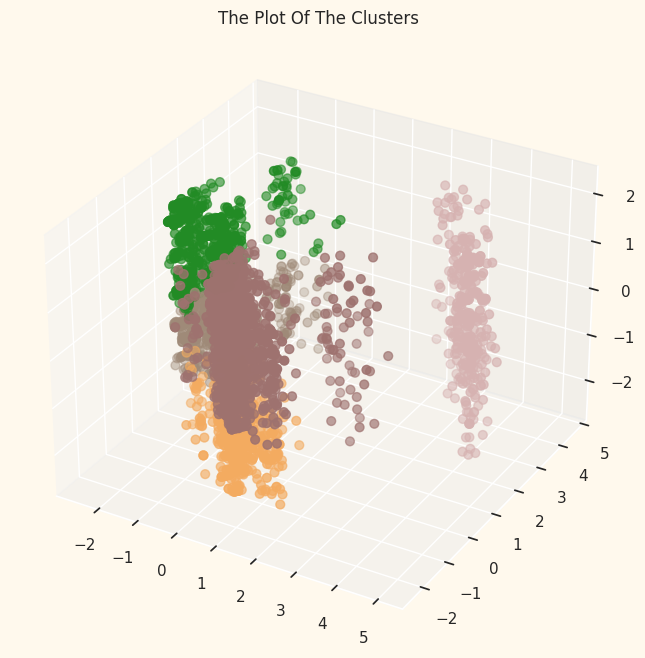

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [ ]:
num_clusters = 2 # Oluşturmak istediğimiz cluster sayısı
km = KMeans(n_clusters=num_clusters, random_state=10)
km.fit(scaled_ds)

num_clusters = 3 # Oluşturmak istediğimiz cluster sayısı
km3 = KMeans(n_clusters=num_clusters, random_state=10)
km3.fit(scaled_ds)

num_clusters = 4 # Oluşturmak istediğimiz cluster sayısı
km4 = KMeans(n_clusters=num_clusters, random_state=10)
km4.fit(scaled_ds)

num_clusters = 5 # Oluşturmak istediğimiz cluster sayısı
km5 = KMeans(n_clusters=num_clusters, random_state=10)
km5.fit(scaled_ds)

num_clusters = 6 # Oluşturmak istediğimiz cluster sayısı
km6 = KMeans(n_clusters=num_clusters, random_state=10)
km6.fit(scaled_ds)

num_clusters = 7 # Oluşturmak istediğimiz cluster sayısı
km7 = KMeans(n_clusters=num_clusters, random_state=10)
km7.fit(scaled_ds)

num_clusters = 8 # Oluşturmak istediğimiz cluster sayısı
km8 = KMeans(n_clusters=num_clusters, random_state=10)
km8.fit(scaled_ds)

KMeans(random_state=10)

kmeans algoritmasına göre kümeleme sonuçlarını optimum kaç küme olması gerektiğini bulmak için inertia değerlerini bulduk.

In [ ]:
print(' 2 Cluster Inertia:', km.inertia_)
print(' 3 Cluster Inertia:', km3.inertia_)
print(' 4 Cluster Inertia:', km4.inertia_)
print(' 5 Cluster Inertia:', km5.inertia_)
print(' 6 Cluster Inertia:', km6.inertia_)
print(' 7 Cluster Inertia:', km7.inertia_)
print(' 8 Cluster Inertia:', km8.inertia_)

 2 Cluster Inertia: 41941.49883201943
 3 Cluster Inertia: 34941.341614248915
 4 Cluster Inertia: 33076.432286954194
 5 Cluster Inertia: 30647.84588283028
 6 Cluster Inertia: 28690.100408790313
 7 Cluster Inertia: 26863.323898773826
 8 Cluster Inertia: 26081.092832069327


inertia değerlerine göre garafigimzi çizdik dirsek değerine göre optimum küme sayısına ulaşmak için

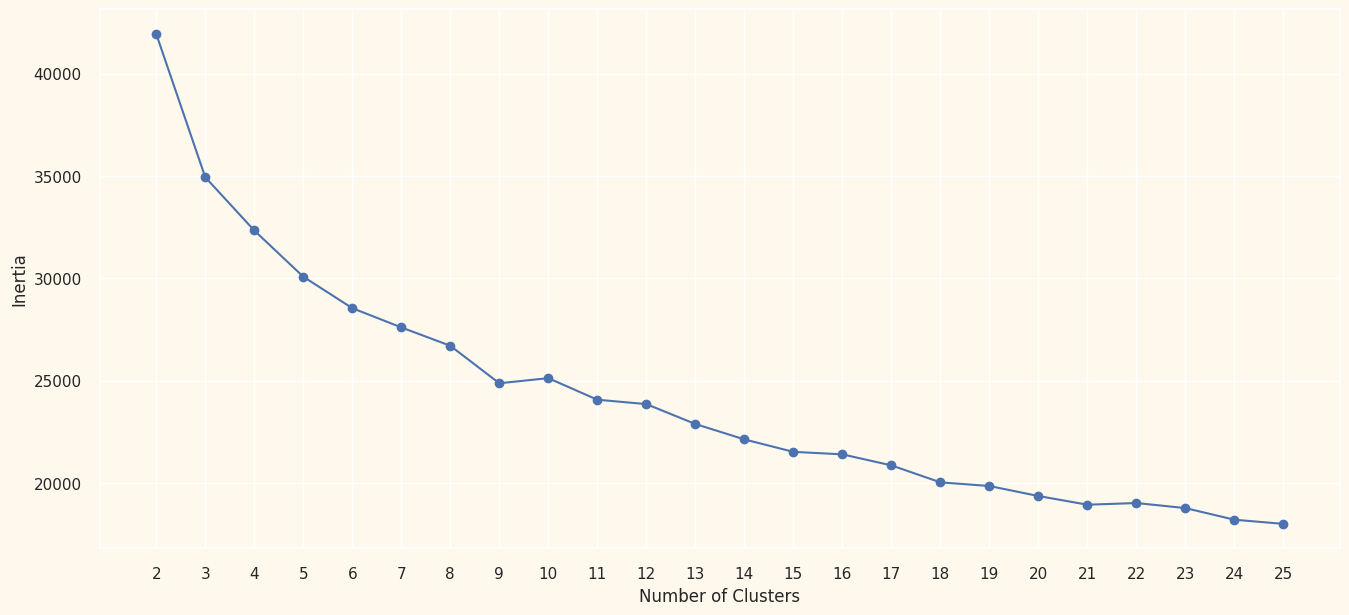

In [ ]:
inertia = []
list_num_clusters = list(range(2,26))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(scaled_ds)
    inertia.append(km.inertia_)

plt.figure(figsize=[16,7])
plt.plot(list_num_clusters, inertia)
plt.scatter(list_num_clusters, inertia)
plt.xticks(range(2,26))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

sadece inertia değeri değil silhouette değerlerini çıkardım.

In [ ]:
print('2 Cluster Silhouette Score:', silhouette_score(scaled_ds, km.labels_))
print('3 Cluster Silhouette Score:', silhouette_score(scaled_ds, km3.labels_))
print('4 Cluster Silhouette Score:', silhouette_score(scaled_ds, km4.labels_))
print('5 Cluster Silhouette Score:', silhouette_score(scaled_ds, km5.labels_))
print('6 Cluster Silhouette Score:', silhouette_score(scaled_ds, km6.labels_))
print('7 Cluster Silhouette Score:', silhouette_score(scaled_ds, km7.labels_))
print('8 Cluster Silhouette Score:', silhouette_score(scaled_ds, km8.labels_))


2 Cluster Silhouette Score: 0.14431651749321311
3 Cluster Silhouette Score: 0.18661386895278453
4 Cluster Silhouette Score: 0.14207006075008716
5 Cluster Silhouette Score: 0.1485051047639711
6 Cluster Silhouette Score: 0.15706941363380797
7 Cluster Silhouette Score: 0.1512963207665606
8 Cluster Silhouette Score: 0.14856374328622898


Silhouette değerlerine göre tekrar dirsek grafiğini çizdirdik ve optimum olarak 5 küme olduğunu bu kısımda da teyit ettim.

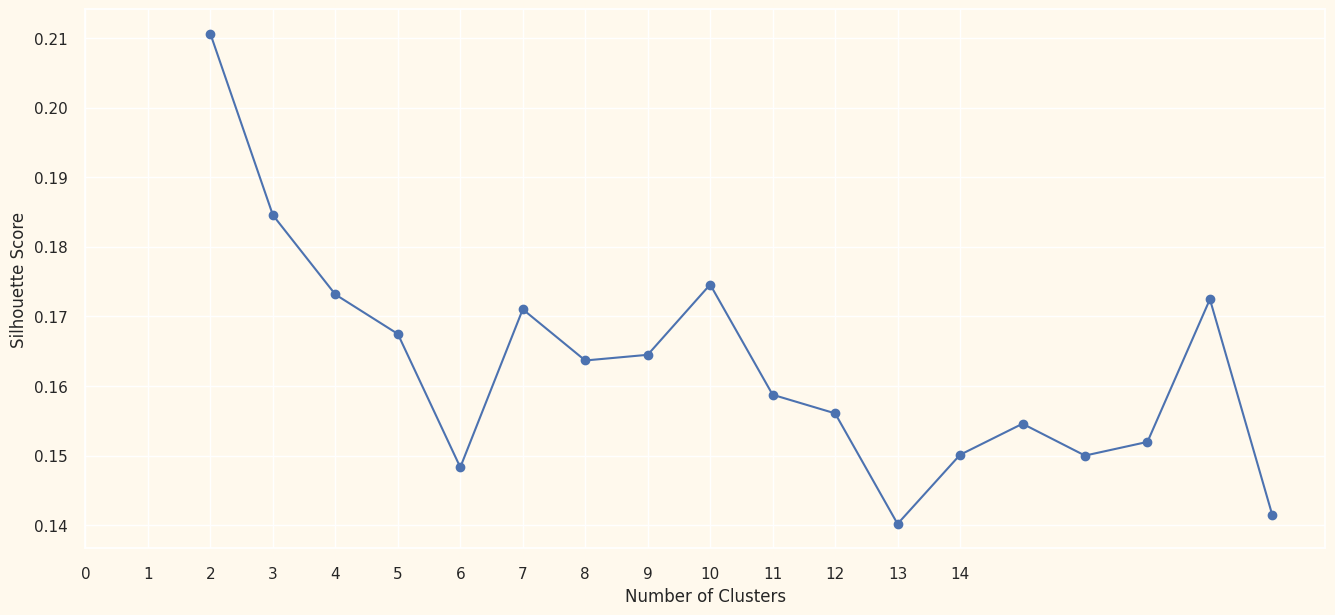

In [ ]:
silhouette = []
list_num_clusters = list(range(2,20))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(scaled_ds)
    silhouette.append(silhouette_score(scaled_ds, km.labels_))

plt.figure(figsize=[16,7])
plt.plot(list_num_clusters, silhouette)
plt.scatter(list_num_clusters, silhouette)
plt.xticks(range(0,15))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [ ]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(scaled_ds)
scaled_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
# Instead of directly assigning yhat_AC, create a new Series with the correct index
data["Clusters"] = pd.Series(yhat_AC, index=scaled_ds.index) # Using scaled_ds index to align with yhat_AC
# If you want to keep only the common rows between data and scaled_ds:
# common_index = data.index.intersection(scaled_ds.index)
# data = data.loc[common_index]  # Keep only common rows in data
# data["Clusters"] = yhat_AC

Bu denetimsiz bir kümeleme olduğu için. Modelimizi değerlendirmek veya puanlamak için etiketlenmiş bir özelliğe sahip değiliz. Bu bölümün amacı, oluşan kümelerdeki örüntüleri incelemek ve kümelerin örüntülerinin doğasını belirlemektir.

Bunun için keşifsel veri analizi ile verilere kümeler ışığında bakacağız ve sonuçlar çıkaracağız.

İlk olarak, kümelerin grup dağılımına bir göz atalım

<ipython-input-30-322c90b95df8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=scaled_ds["Clusters"], palette= pal)


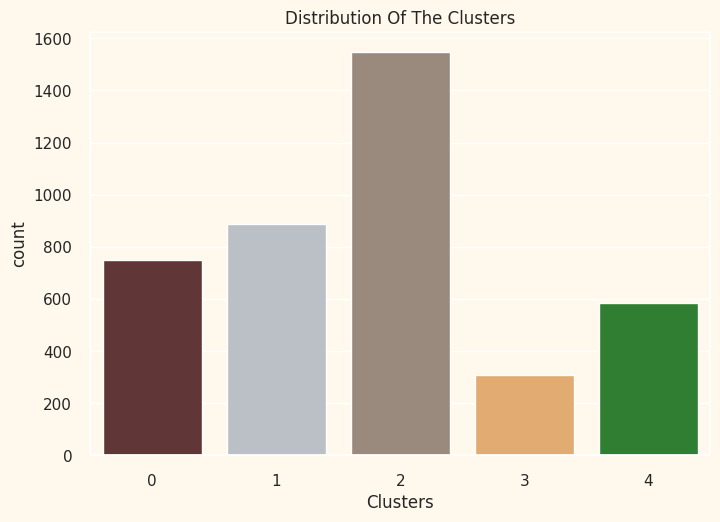

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", "#228B25"]
pl = sns.countplot(x=scaled_ds["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

Bu kısımdan sonra kümelerin değişkenlere göre dağılımını incelemek için değişlenlere göre grafiklerini çıkarmaya başlayacağız grafiklere göre kümeler hakkında yorum yapmaya başlayabiliriz.

kümelerin yaş kategorisine göre göre durumları analiz edildi.
grup2 orta yaş ağırlıklı
grup3 yaşlı yaş ağırlıklı
genç yaş aralığında grup3 ve grup4 kümesinden kimse bulunmuyor.
yaşlı yaş aralığında grup1 kümesi yer almıyor.

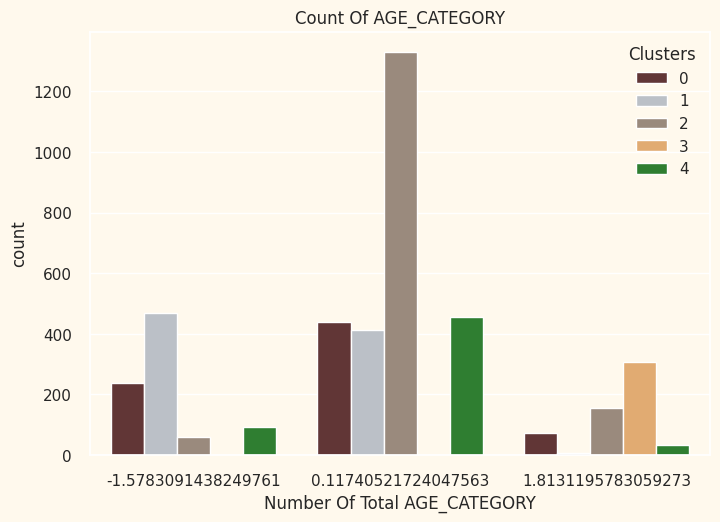

In [ ]:
#Creating a feature to get a sum of accepted promotions
#scaled_ds["Total_Promos"] = scaled_ds["AcceptedCmp1"]+ scaled_ds["AcceptedCmp2"]+ scaled_ds["AcceptedCmp3"]+ scaled_ds["AcceptedCmp4"]+ scaled_ds["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=scaled_ds["AGE_CATEGORY"],hue=scaled_ds["Clusters"], palette= pal)
pl.set_title("Count Of AGE_CATEGORY")
pl.set_xlabel("Number Of Total AGE_CATEGORY")
plt.show()

Kampaya tipine göre kümlerin durumuna bakıldığında
0--genele çıkılan kampnaya
1-- özel gruplara çıklan kampanya
grup0,grup1,grup2 ve grup4 genele çıklan kampanyalardan yaralanmış en çok grup3 mevcut
grup3 özel çıklan kampanyalardan yararlanmıi ayrıca grup1 de özele çıklan kmapyalardan yararlanmış durumda

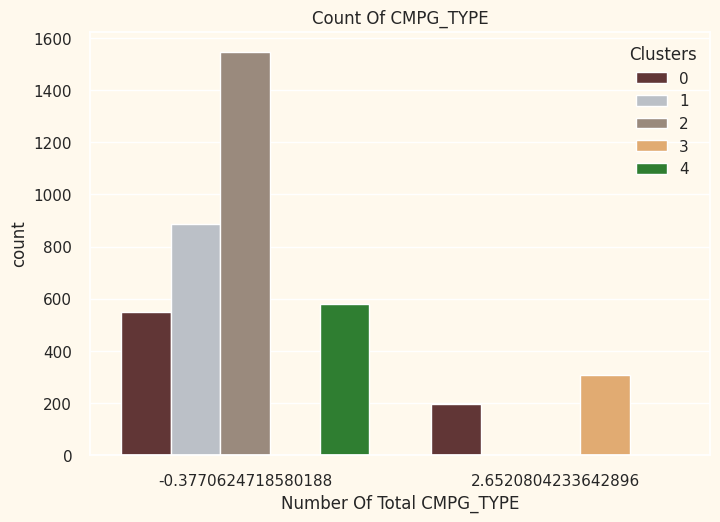

In [ ]:
#Creating a feature to get a sum of accepted promotions
#scaled_ds["Total_Promos"] = scaled_ds["AcceptedCmp1"]+ scaled_ds["AcceptedCmp2"]+ scaled_ds["AcceptedCmp3"]+ scaled_ds["AcceptedCmp4"]+ scaled_ds["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=scaled_ds["CMPG_TYPE"],hue=scaled_ds["Clusters"], palette= pal)
pl.set_title("Count Of CMPG_TYPE")
pl.set_xlabel("Number Of Total CMPG_TYPE")
plt.show()

Gelire göre grupların durumuna baklıldığında her grup içinde düşük orta ve yüksek gelirli grupların olduğu grup2 için yüksek gelir grubunda daha fazla olduğu gözlemleniyor

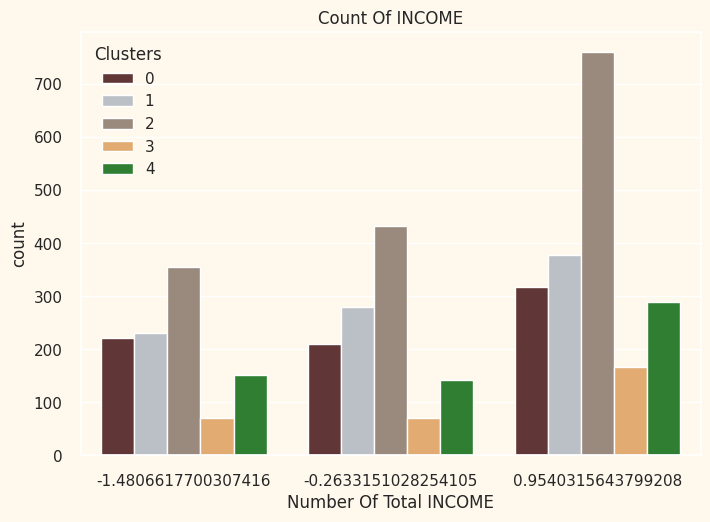

In [ ]:
#Creating a feature to get a sum of accepted promotions
#scaled_ds["Total_Promos"] = scaled_ds["AcceptedCmp1"]+ scaled_ds["AcceptedCmp2"]+ scaled_ds["AcceptedCmp3"]+ scaled_ds["AcceptedCmp4"]+ scaled_ds["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=scaled_ds["INCOME"],hue=scaled_ds["Clusters"], palette= pal)
pl.set_title("Count Of INCOME")
pl.set_xlabel("Number Of Total INCOME")
plt.show()

Eğitiö bazında gruplar incelendi,ğinde homojen bir dağılım görülmekte tüm gruplar için temel,lisans ve lisans üstü eğitim alanların sayısında eşitlik gözlemleniyor.

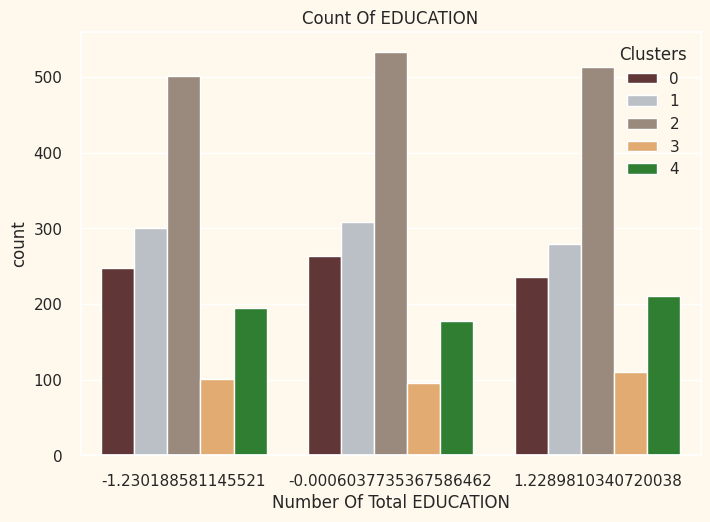

In [ ]:
#Creating a feature to get a sum of accepted promotions
#scaled_ds["Total_Promos"] = scaled_ds["AcceptedCmp1"]+ scaled_ds["AcceptedCmp2"]+ scaled_ds["AcceptedCmp3"]+ scaled_ds["AcceptedCmp4"]+ scaled_ds["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=scaled_ds["EDUCATION"],hue=scaled_ds["Clusters"], palette= pal)
pl.set_title("Count Of EDUCATION")
pl.set_xlabel("Number Of Total EDUCATION")
plt.show()

Satış kanallarına göre grupları incelediğimizde grup2 ttofis üzerinden daha çok işlem yaptığı görülmekte ayrıca grup0 grup1 ve grup3 ttofis üzerinde işlem yaptıkları grup 4 ise ttoifs hariçi kanalları tercih ettiği (moim,call center,ıvr,internet işlem merkezi vb.) görülmketedir.

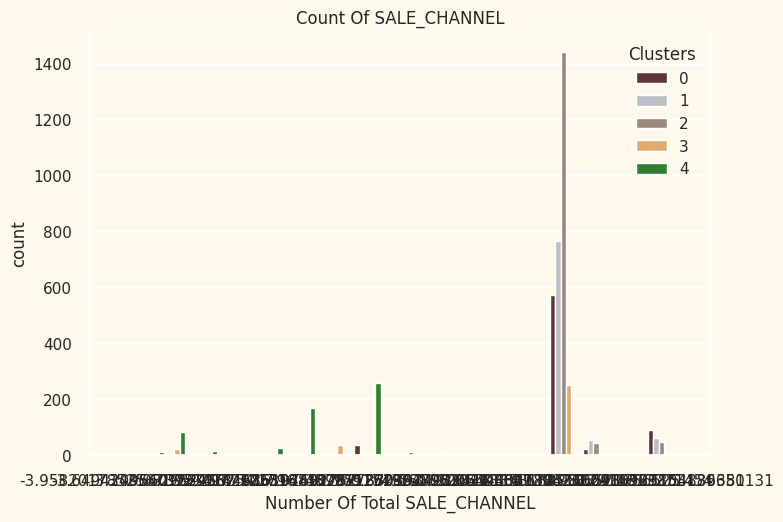

In [ ]:
#Creating a feature to get a sum of accepted promotions
#scaled_ds["Total_Promos"] = scaled_ds["AcceptedCmp1"]+ scaled_ds["AcceptedCmp2"]+ scaled_ds["AcceptedCmp3"]+ scaled_ds["AcceptedCmp4"]+ scaled_ds["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=scaled_ds["SALE_CHANNEL"],hue=scaled_ds["Clusters"], palette= pal)
pl.set_title("Count Of SALE_CHANNEL")
pl.set_xlabel("Number Of Total SALE_CHANNEL")
plt.show()

Çocuk sayısına göre oluşan grupları incelediğimizde çocuğu bulunmayanlar tüm gruplarda sayıları oldukça yüksek en fazla grup1 olarak görülmkete birden fazla çocuk sahibi durumuna baktığımızda grup 0,2,3,4 öne çıkmakta.

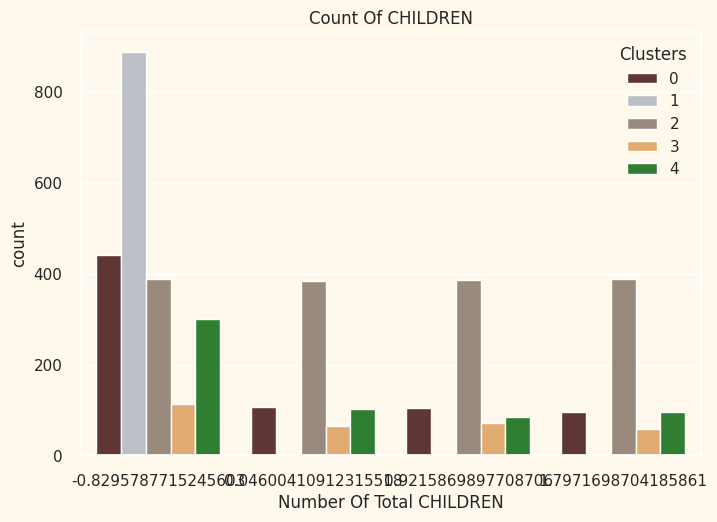

In [ ]:
#Creating a feature to get a sum of accepted promotions
#scaled_ds["Total_Promos"] = scaled_ds["AcceptedCmp1"]+ scaled_ds["AcceptedCmp2"]+ scaled_ds["AcceptedCmp3"]+ scaled_ds["AcceptedCmp4"]+ scaled_ds["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=scaled_ds["CHILDREN"],hue=scaled_ds["Clusters"], palette= pal)
pl.set_title("Count Of CHILDREN")
pl.set_xlabel("Number Of Total CHILDREN")
plt.show()

Verilen promosyonların kabul edilipi edilmediğine göre gruplara bakacak olursak grup3 promosyonları kabul etmediği, grup 0,1,2,4 promosyonları kabul ettiği ve grup2 dekilerin en fazla promosyon kabul eden sınıf olduğu görülmektedir.

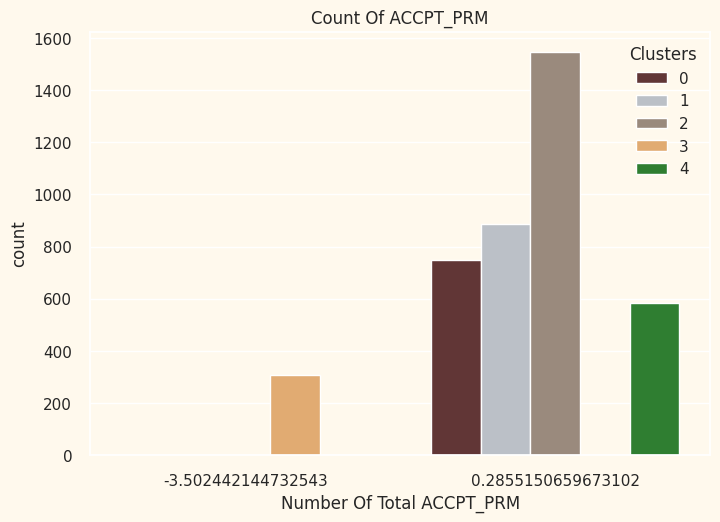

In [ ]:
#Creating a feature to get a sum of accepted promotions
#scaled_ds["Total_Promos"] = scaled_ds["AcceptedCmp1"]+ scaled_ds["AcceptedCmp2"]+ scaled_ds["AcceptedCmp3"]+ scaled_ds["AcceptedCmp4"]+ scaled_ds["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=scaled_ds["ACCPT_PRM"],hue=scaled_ds["Clusters"], palette= pal)
pl.set_title("Count Of ACCPT_PRM")
pl.set_xlabel("Number Of Total ACCPT_PRM")
plt.show()

Sipariş durumuna göre grupları incelediğimizde nakil işlemlerinde grup 0,1,2 yüksek olduğu
kampanya katılım/değişiklik için grup2 için işlemlerin yüksek olduğu
grp4 için fiber dönüşüm işlemlerinin yüksek olduğu görülmektedir.

1041 Nakil
983	Kampanya Katılımı/Değişikliği
721	NAKİL
713	Kampanya Katılımı/Degisikligi
411	Paket Değişikliği
105	Satış
90	Fiber Dönüşüm
9	Donusum/Geri Donusum
2

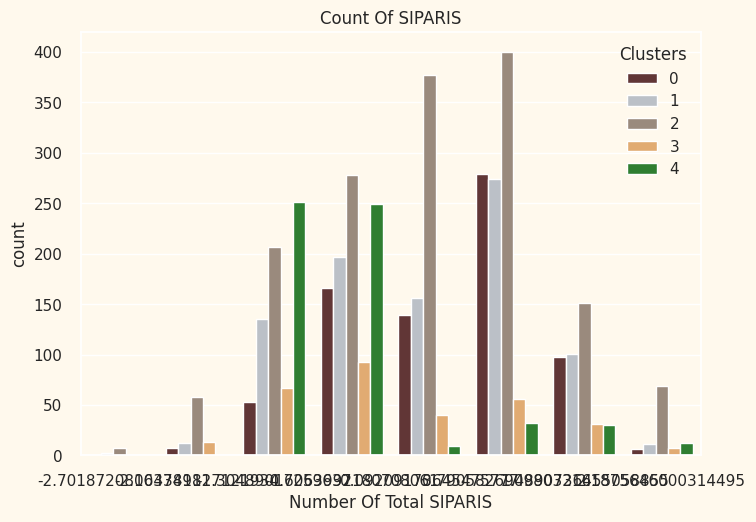

In [ ]:
#Creating a feature to get a sum of accepted promotions
#scaled_ds["Total_Promos"] = scaled_ds["AcceptedCmp1"]+ scaled_ds["AcceptedCmp2"]+ scaled_ds["AcceptedCmp3"]+ scaled_ds["AcceptedCmp4"]+ scaled_ds["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=scaled_ds["SIPARIS"],hue=scaled_ds["Clusters"], palette= pal)
pl.set_title("Count Of SIPARIS")
pl.set_xlabel("Number Of Total SIPARIS")
plt.show()